# The Formal Theory of Dynamic Programming

## 1. Philosophical Definition
Dynamic Programming (DP) is an algorithmic paradigm that solves a complex problem by breaking it into a collection of simpler subproblems, solving each of those subproblems just once, and storing their solutions using a memory-based data structure (array, map, etc.).

It is essentially **mathematical induction** implemented in code.

---

## 2. Necessary Conditions for DP
Not every optimization problem can be solved with DP. A problem must satisfy:

### A. Optimal Substructure
An optimal solution to a problem of size $n$ contains within it optimal solutions to subproblems of size $k < n$. 
* *Example:* In the shortest path from A to C, if the path goes through B, the segment A→B must also be the shortest path between A and B.

### B. Overlapping Subproblems
The recursive space must visit the same subproblems multiple times. If the subproblems are unique every time, use **Divide and Conquer** (like Mergesort) instead.

---

## 3. The Two Implementation Strategies

### Strategy A: Top-Down (Memoization)
This is the "Natural" approach. You write a recursive function and add a "lookup table" to check if you've already solved the current state.
- **Pros:** Only solves subproblems that are actually needed. Easier to conceptualize from a recurrence relation.
- **Cons:** Risk of `RecursionError` (Stack Overflow) in deep trees.

### Strategy B: Bottom-Up (Tabulation)
This is the "Engineers" approach. You fill a table (usually 1D or 2D array) iteratively.
- **Pros:** No recursion overhead. Often more memory-efficient (space optimization is possible).
- **Cons:** Must solve all subproblems in the table, even if some aren't strictly necessary for the final answer.

---

## 4. The 6-Step "PhD to SWE" Framework
When you see a DP problem in an interview, follow this rigorous derivation:

1.  **Define the State:** What does $dp[i]$ or $dp[i][j]$ represent in the context of the problem?
2.  **State Transition Relation:** Write the mathematical formula. $dp[i] = f(dp[i-1], dp[i-2], ...)$.
3.  **Base Cases:** Identify the smallest subproblems (e.g., $dp[0] = 0$).
4.  **Direction of Calculation:** Should I iterate $0 \to n$ or $n \to 0$?
5.  **Identify Final Answer:** Is it at $dp[n]$ or $\max(dp)$?
6.  **Space Optimization:** Can I reduce the table from $O(n)$ to $O(1)$?

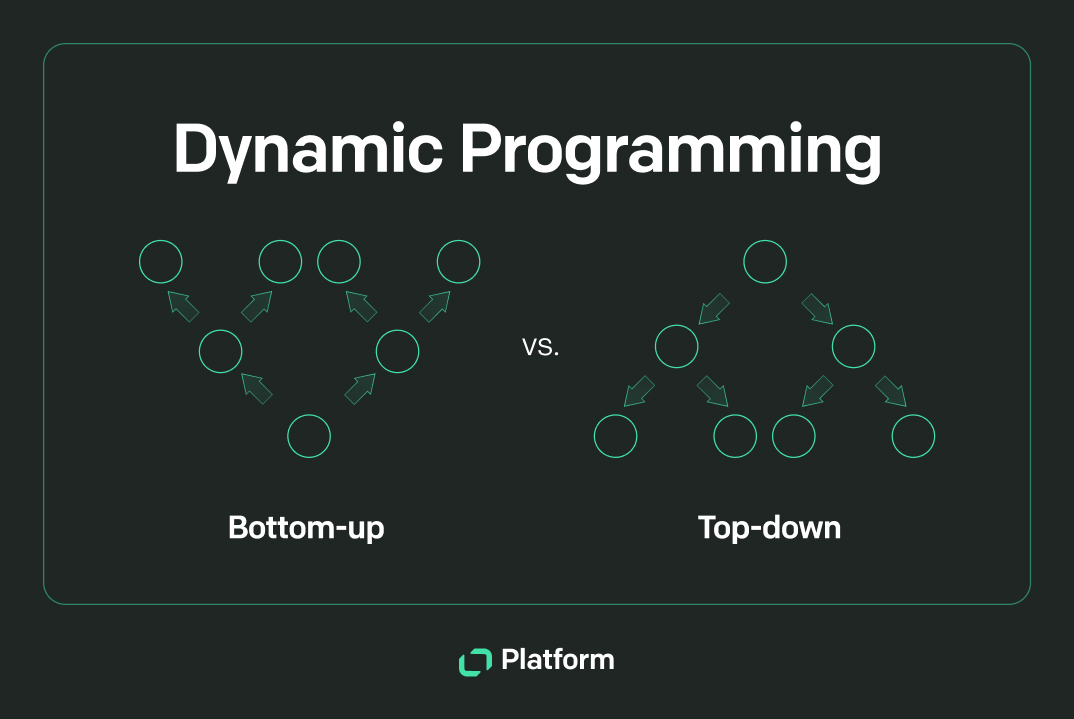

# DP Implementation Strategies in Pure Python

### Key Patterns to Remember:
1.  **Initialization:** Always handle the `n=0` or `n=1` cases first to avoid index errors.
2.  **State Transition:** This is the "heart" of the code. Usually involves `min()`, `max()`, or `+`.
3.  **Space Compression:** If `dp[i]` only depends on `dp[i-1]`, you can replace the whole list with just two variables.

In [1]:
def solve_min_cost_stairs(cost):
    """
    Problem: Each step has a cost. You can move 1 or 2 steps. 
    Find the minimum cost to reach the top.
    
    Example: cost = [10, 15, 20]
    Output: 15 (Start at index 1, pay 15, climb 2 steps to reach the top)
    """
    n = len(cost)
    
    # --- 1. Top-Down (Memoization) ---
    # We use a dictionary for the 'memo'
    memo = {}
    
    def min_cost_recursive(i):
        if i <= 1:
            return 0
        if i in memo:
            return memo[i]
        
        # Recurrence: cost to reach i is min(cost to reach i-1 + step cost, 
        #                                  cost to reach i-2 + step cost)
        res = min(min_cost_recursive(i - 1) + cost[i - 1],
                  min_cost_recursive(i - 2) + cost[i - 2])
        memo[i] = res
        return res

    # --- 2. Bottom-Up (Tabulation) ---
    def min_cost_tabulation(cost):
        n = len(cost)
        # dp[i] is the min cost to reach step i
        dp = [0] * (n + 1)
        
        # We start at index 0 or 1 for free
        for i in range(2, n + 1):
            option1 = dp[i-1] + cost[i-1]
            option2 = dp[i-2] + cost[i-2]
            dp[i] = min(option1, option2)
            
        return dp[n]

    # --- 3. Space Optimized (Pure Python Variables) ---
    def min_cost_optimized(cost):
        prev2, prev1 = 0, 0
        for i in range(2, len(cost) + 1):
            current = min(prev1 + cost[i-1], prev2 + cost[i-2])
            prev2 = prev1
            prev1 = current
        return prev1

    # Running tests
    print(f"Recursive/Memo: {min_cost_recursive(n)}")
    print(f"Tabulation:     {min_cost_tabulation(cost)}")
    print(f"Space Optimized: {min_cost_optimized(cost)}")

# Test Data
stair_costs = [1, 100, 1, 1, 1, 100, 1, 1, 100, 1]
solve_min_cost_stairs(stair_costs)

Recursive/Memo: 6
Tabulation:     6
Space Optimized: 6
